In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.usetex"] = True
plt.rcParams["font.serif"] = ["Computer Modern"]

In [2]:
def bernstein(t: float, k: int, n: int):
    from math import comb
    
    # assert k in range(n + 1), "k debe pertenecer a \left[0, n\right] \cap \mathbb{Z}."
    # assert 0 <= t <= 1, "t debe estar en el intervalo [0, 1]"
    
    return comb(n, k) * t**k * (1 - t) ** (n - k)

In [3]:
bernstein(0.5, 1, 3)

0.375

In [4]:
def plot_bernstein(n: int):
    t = np.linspace(0, 1)

    for k in range(n + 1):
        plt.plot(t, bernstein(t, k, n), lw=0.75)

    plt.title(r"Polinomios de Bernstein $B_{k, n}\left(t\right)$")

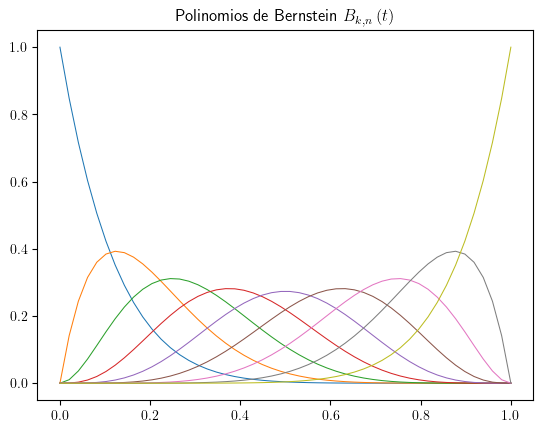

In [5]:
plot_bernstein(n=8)

In [6]:
def bernstein_generalized(t: np.array, a: int, b: int, k: int, n: int):
    from math import comb

    return comb(n, k) * ((t - a) ** k * (b - t) ** (n - k)) / (b - a) ** n

In [7]:
def plot_bernstein_generalized(a: float, b: float, n: int):
    t = np.linspace(a, b)
    for k in range(n + 1):
        plt.plot(t, bernstein_generalized(t=t, a=a, b=b, k=k, n=n))

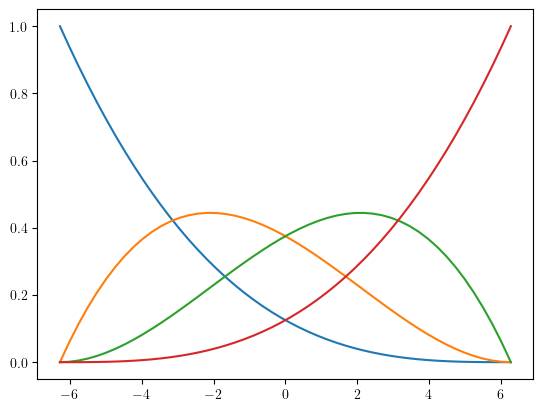

In [8]:
plot_bernstein_generalized(a=-2 * np.pi, b=2 * np.pi, n=3)

In [9]:
# TODO: probar ejemplos
def bernstein_derivative(t: float, k: int, n: int):
    return n * bernstein(t=t, k=k - 1, n=n - 1) - bernstein(t=t, k=k, n=n - 1)

In [10]:
def plot_bernstein_derivative(n: int):
    t = np.linspace(0, 1)

    for k in range(n + 1):
        plt.plot(t, bernstein_derivative(t, k, n), lw=0.75)

    plt.title(r"Polinomios de Bernstein $B^{\prime}_{k, n}\left(t\right)$")

In [11]:
# plot_bernstein_derivative(n=4)

In [12]:
# ejercicio, definirlo por recurrencia

In [13]:
# print(x)
# x_new = (x - a) / (b - a)
# Verificacion
# assert x_new[0] == 0
# assert x_new[-1] == 1

In [14]:
def maximum_value_bernstein(n: int):
    for k in range(n + 1):
        print(f"k = {k}, en {k / n}, su máximo es {bernstein(t=k / n, k=k, n=n)}")

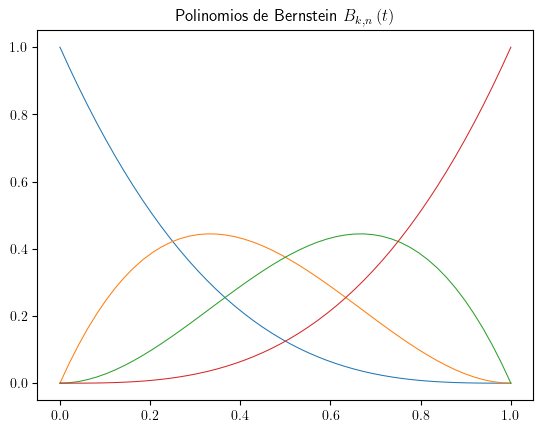

In [15]:
plot_bernstein(n=3)

In [16]:
maximum_value_bernstein(n=3)

k = 0, en 0.0, su máximo es 1.0
k = 1, en 0.3333333333333333, su máximo es 0.44444444444444453
k = 2, en 0.6666666666666666, su máximo es 0.4444444444444445
k = 3, en 1.0, su máximo es 1.0


In [17]:
# ejercicio: calcular la derivada usando la fórmula de la página 6/44

In [18]:
from typing import Callable

In [19]:
# ejercicio: bernstein_f para un dominio [a, b]

In [20]:
def bernstein_f(t: np.array, f: Callable, n: int):
    from math import comb

    b = 0
    for k in range(n + 1):
        b = b + f(k / n) * comb(n, k) * t**k * (1 - t) ** (n - k)
        # print(b)
    return b

In [22]:
# TODO: Corregir
def plot_weierstrass(f: Callable, numbers: list):
    x = np.linspace(0, 1)
    y = f(x)
    plt.plot(x, y, "r")
    for n in numbers:
        plt.plot(x, bernstein_f(x, f, n))

In [3]:
bernstein(0.5, 1, 3)

0.375

In [ ]:
# TODO: Graficar que B_n(f) -- (uniformemente) --> f, B^{\prime}_n(f) -- (uniformemente) --> f^{\prime}
# https://www2.math.upenn.edu/~kadison/bernstein.pdf

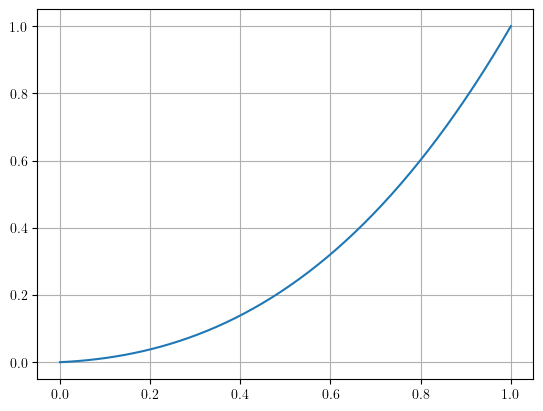

In [34]:
x = np.linspace(0, 1)
n = 4
plt.grid()
plt.plot(x, bernstein_f(x, lambda x: x * x * x, n))

In [35]:
# plt.plot(x, bernstein_f(x, lambda x: np.cos(x), 3), "g")
# plt.plot(x, bernstein_f(x, lambda x: np.cos(x), 30), "y")

In [26]:
# np.sum(lista)

In [27]:
def casteljau(puntos: np.array, t: float):
    assert 0 <= t <= 1
    n = puntos.shape[0] - 1
    alfa = np.copy(puntos)

    for r in range(1, n + 1):
        for i in range(0, n - r + 1):
            # print(f"(r, i) = {(r, i)}\t\t(r - 1, i) = {(r - 1, i)}\t (r - 1, i + 1) = {(r - 1, i + 1)}")
            puntos_0[i] = (1 - t) * puntos_0[i] + t * puntos_0[i + 1]
    return puntos_0

In [28]:
puntos = np.array([(0, 0), (0, 2), (8, 2), (4, 0)])

In [31]:
# casteljau(puntos, 0.5)

In [ ]:
t = 0.5

In [ ]:
puntos_0

In [ ]:
puntos_0[1]

In [ ]:
# primer punto es multplicado por (1 - t)
# segundo punto es multiplicado por t